<a href="https://colab.research.google.com/github/sumitkushwaha112/ML-projects-/blob/main/KNN_Clustering_On_The_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

sumitsinghkushwaha_knn_clustering_iris_dataset_path = kagglehub.dataset_download('sumitsinghkushwaha/knn-clustering-iris-dataset')

print('Data source import complete.')


# KNN Clustering on the Iris Dataset

**To implement and demonstrate K-Nearest Neighbors (KNN) clustering for grouping similar types of flowers using the Iris dataset. We will also visualize the clusters and evaluate model performance using silhouette scores.**

**Dataset:** https://www.kaggle.com/datasets/arshid/iris-flower-dataset/code

# import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Load the dataset
df = pd.read_csv('/kaggle/input/knn-clustering-iris-dataset/IRIS (2).csv')

In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Distribution of Features

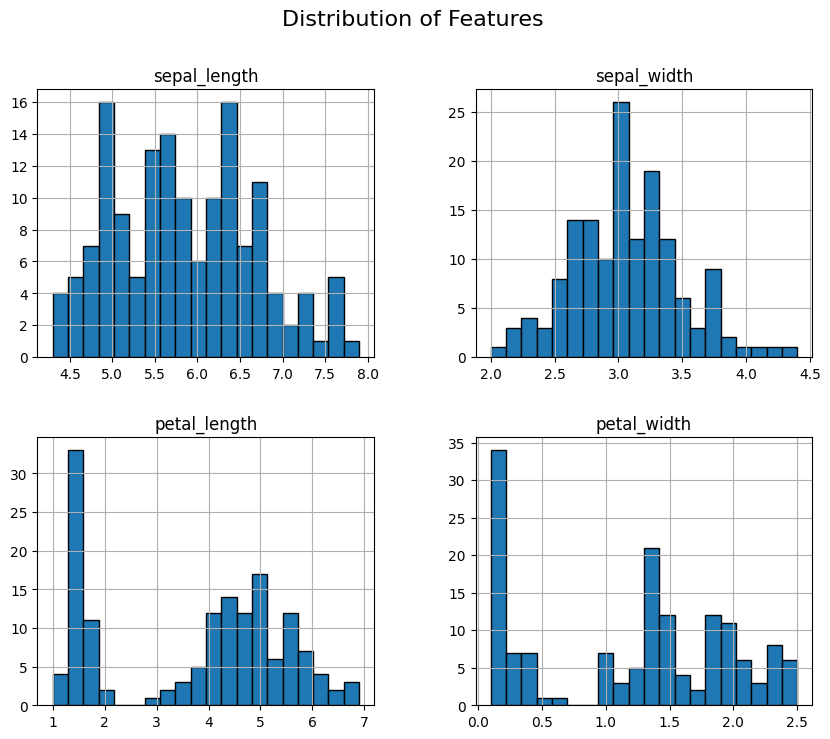

In [ ]:

# Histograms for each feature
df.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle("Distribution of Features", size=16)
plt.show()

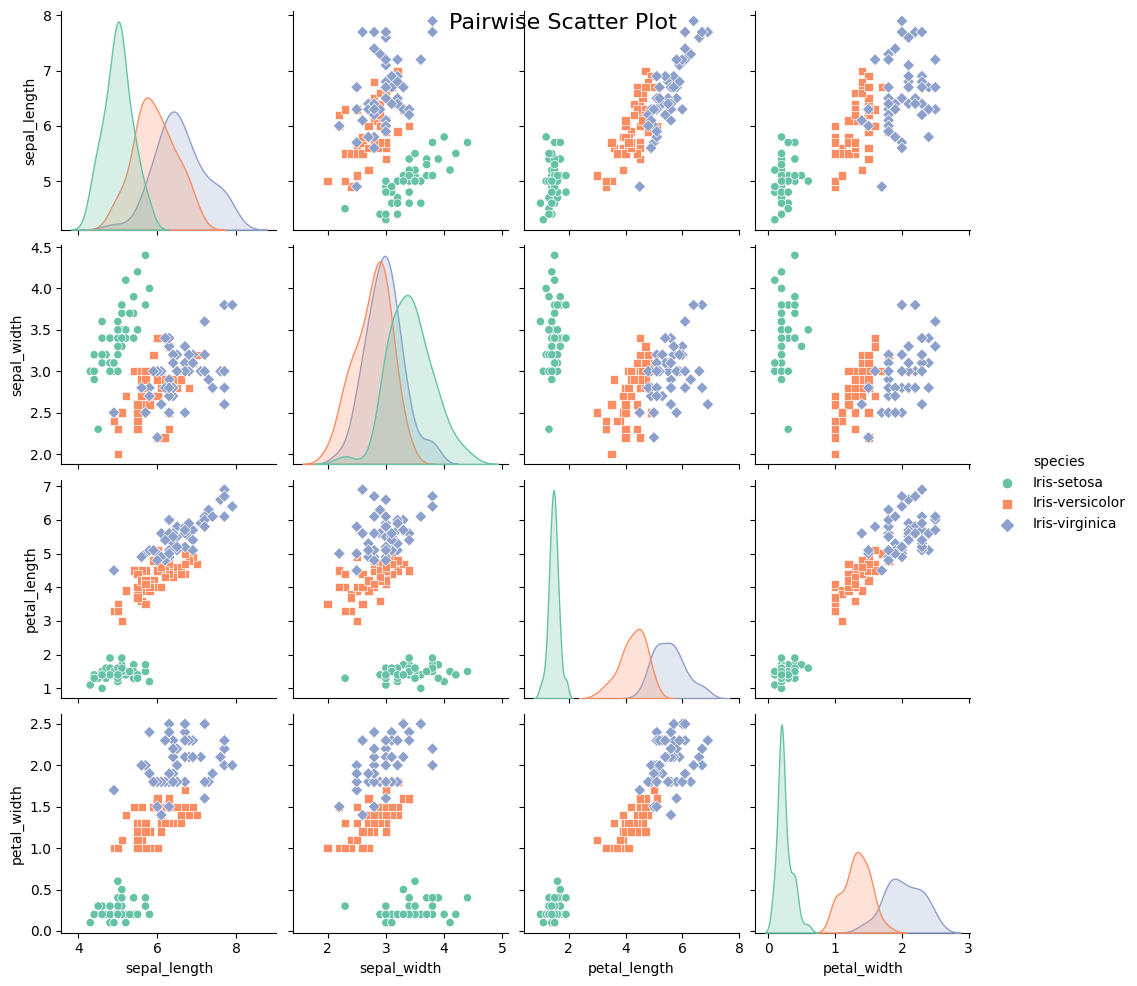

In [ ]:
# Pair plot for all features, colored by species
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette="Set2")
plt.suptitle("Pairwise Scatter Plot", size=16)
plt.show()

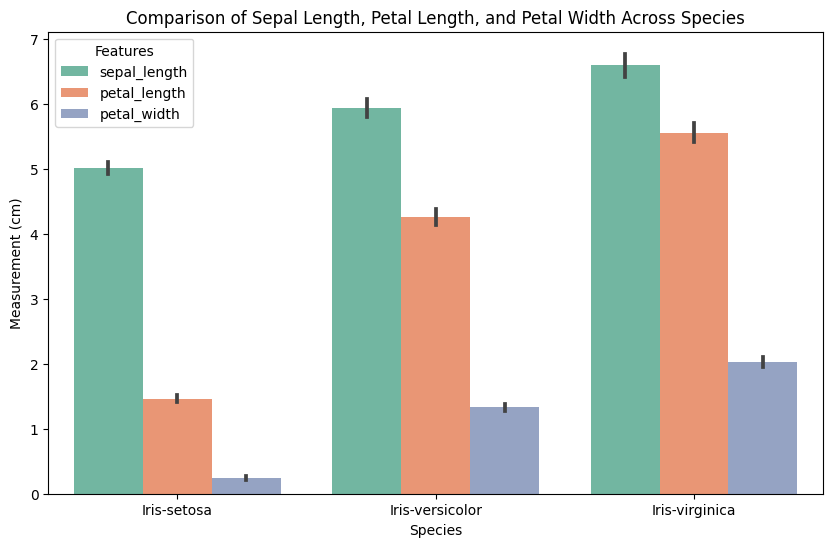

In [ ]:
df_melted = df.melt(id_vars='species', value_vars=['sepal_length', 'petal_length', 'petal_width'],
                           var_name='Feature', value_name='Measurement')
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='Measurement', hue='Feature', data=df_melted, palette='Set2')
plt.title('Comparison of Sepal Length, Petal Length, and Petal Width Across Species')
plt.xlabel('Species')
plt.ylabel('Measurement (cm)')
plt.legend(title='Features')
plt.show()


#  Correlation between Features

In [ ]:
scaler = LabelEncoder()

df['species'] = scaler.fit_transform(df['species'])

In [ ]:
df.corr

<bound method DataFrame.corr of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

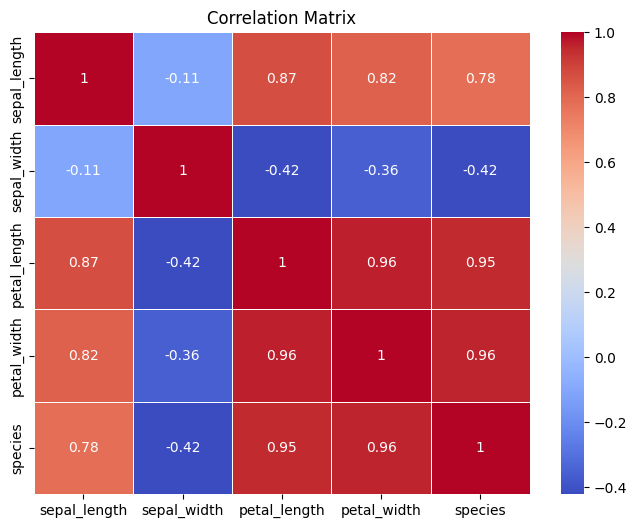

In [ ]:

# Generate a correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Preprocess the data

In [ ]:
# Define feature columns (all columns except 'species')
X = iris_df.drop('species', axis=1)
# Target labels (species column)
y = iris_df['species']
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit and transform the features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Check the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


# Apply K-Nearest Neighbors (KNN) clustering algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 1. Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
# 2. Train the KNN model
knn.fit(X_train, y_train)
# 3. Make predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
# Classification Report (includes precision, recall, f1-score)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:\n", class_report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Evaluate performance using silhouette scores and visualize the clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# 1. Apply K-Means Clustering
# We'll use 3 clusters since the Iris dataset has 3 species
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Cluster assignments
clusters = kmeans.labels_
# 2. Compute Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Silhouette Score for K-Means Clustering:", silhouette_avg)

Silhouette Score for K-Means Clustering: 0.45994823920518635


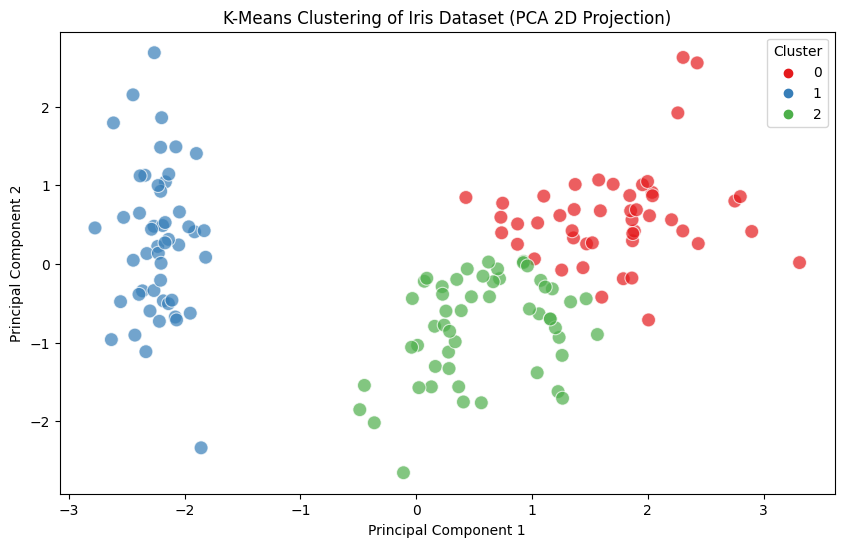

In [ ]:
from sklearn.decomposition import PCA
# Reduce the feature space to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', s=100, alpha=0.7)
plt.title("K-Means Clustering of Iris Dataset (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()